In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv('monthly_combined.csv')

# Feature Engineering
df['timestamp'] = pd.to_datetime(df['TIME'], format='%Y-%m')

# Train Linear Regression Model
X = df['timestamp'].values.astype(int).reshape(-1, 1)
y = df['BIKE_USAGE'].values
model = LinearRegression()
model.fit(X, y)

# Generate Future Timestamps
future_timestamps = pd.date_range(start='2023-12', end='2030-12', freq='MS')

# Make Predictions
future_timestamps_int = future_timestamps.values.astype(int).reshape(-1, 1)
predictions = model.predict(future_timestamps_int)

# Save Predictions to CSV with 'YYYY-MM' format
predictions_df = pd.DataFrame({'TIME': future_timestamps.strftime('%Y-%m'), 'BIKE_USAGE': predictions})
predictions_df.to_csv('bike_predictions_with_pandemic.csv', index=False)


In [27]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load Data
df = pd.read_csv('monthly_combined_pre_pandemic.csv')

# Feature Engineering
df['timestamp'] = pd.to_datetime(df['TIME'], format='%Y-%m')

# Train Linear Regression Model
X = df['timestamp'].values.astype(int).reshape(-1, 1)
y = df['BIKE_USAGE'].values
model = LinearRegression()
model.fit(X, y)

# Generate Future Timestamps
future_timestamps = pd.date_range(start='2020-03', end='2030-12', freq='MS')

# Make Predictions
future_timestamps_int = future_timestamps.values.astype(int).reshape(-1, 1)
predictions = model.predict(future_timestamps_int)

# Save Predictions to CSV with 'YYYY-MM' format
predictions_df = pd.DataFrame({'TIME': future_timestamps.strftime('%Y-%m'), 'BIKE_USAGE': predictions})
predictions_df.to_csv('bike_predictions_without_pandemic.csv', index=False)


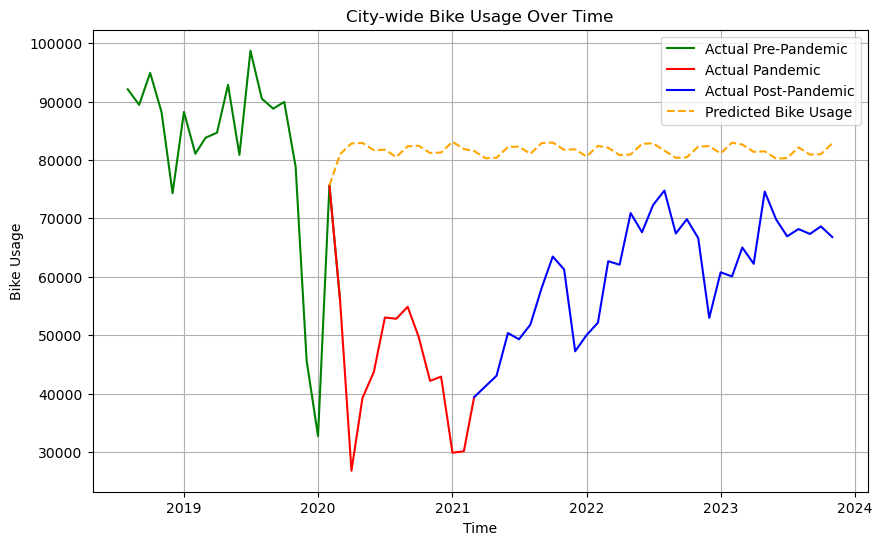

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

actual_df = pd.read_csv('monthly_combined.csv', parse_dates=['TIME'])
predicted_df = pd.read_csv('bike_predictions_without_pandemic2023.csv', parse_dates=['TIME'])

# Plotting
plt.figure(figsize=(10, 6))

# Plot actual bike usage data for different timelines
pre_pandemic_df = actual_df[actual_df['TIME'] < '2020-04']
plt.plot(pre_pandemic_df['TIME'], pre_pandemic_df['BIKE_USAGE'], label='Actual Pre-Pandemic', color='green')

pandemic_df = actual_df[(actual_df['TIME'] >= '2020-02') & (actual_df['TIME'] < '2021-04')]
plt.plot(pandemic_df['TIME'], pandemic_df['BIKE_USAGE'], label='Actual Pandemic', color='red')

post_pandemic_df = actual_df[actual_df['TIME'] >= '2021-03']
plt.plot(post_pandemic_df['TIME'], post_pandemic_df['BIKE_USAGE'], label='Actual Post-Pandemic', color='blue')

# Plot predicted bike usage data on the same timeline
plt.plot(predicted_df['TIME'], predicted_df['BIKE_USAGE'], label='Predicted Bike Usage', color='orange', linestyle='dashed')

plt.title('City-wide Bike Usage Over Time')
plt.xlabel('Time')
plt.ylabel('Bike Usage')
plt.legend()
plt.grid(True)
plt.show()


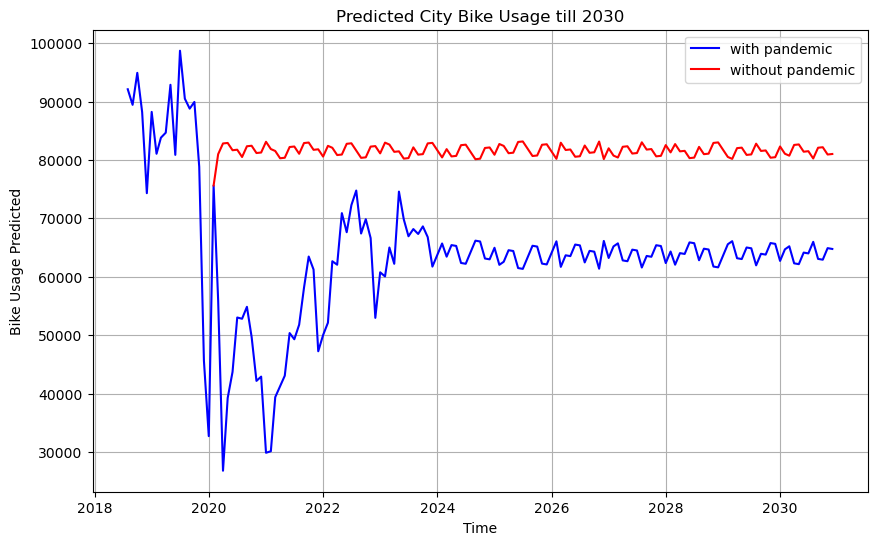

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

with_pandemic = pd.read_csv('bike_predictions_with_pandemic.csv')

no_pandemic = pd.read_csv('bike_predictions_without_pandemic.csv')

# Convert TIME column to datetime format
with_pandemic['TIME'] = pd.to_datetime(with_pandemic['TIME'])
no_pandemic['TIME'] = pd.to_datetime(no_pandemic['TIME'])

plt.figure(figsize=(10, 6))


plt.plot(with_pandemic['TIME'], with_pandemic['BIKE_USAGE'], label='with pandemic', color='blue')
plt.plot(no_pandemic['TIME'], no_pandemic['BIKE_USAGE'], label='without pandemic', color='red')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Bike Usage Predicted')
plt.title('Predicted City Bike Usage till 2030')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
